In [1]:
import numpy

import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

In [2]:
# PARAMS
lstm_size = 50
epochs = 1000
patience = 100
batch_size = 10
activation = 'softsign'

In [3]:
# fix random seed for reproducibility
numpy.random.seed(1234)

clean_file   = "/data/alexa-32k.txt"
malware_file = "/data/dga-32k.txt"
save_file    = "/models/model-new.h5"

In [4]:
# Load clean and malware datasets
with open(clean_file) as f:
    clean_domains = f.read().splitlines()
with open(malware_file) as f:
    malware_domains = f.read().splitlines()

In [5]:
# Create Dictionary
charset = list("abcdefghijklmnopqrstuvwxyz0123456789.-")
dictionary = dict(zip(charset, range(len(charset))))
reverse_dictionary = dict(zip(range(len(charset)), charset))

In [6]:
# Translate Domain Name to Vector
def domain_to_vector(domain, dictionary):
    res = []
    for c in list(domain):
        v = [float(0)] * len(dictionary)
        v[dictionary[c]] = 1.0
        res.append(v)
    return res

In [7]:
# Translate Domain List to DataSet format
def domainlist_to_dataset(domainlist, result, dictionary):
    x = [ domain_to_vector(v, dictionary) for v in domainlist ]
    y = [ [result] for y in range(len(x))]
    
    return x, y

In [8]:
# Extract Domain Lists and Merge them
x_clean_noarray, y_clean_noarray = domainlist_to_dataset(clean_domains, 0, dictionary)
x_malware_noarray, y_malware_noarray = domainlist_to_dataset(malware_domains, 1, dictionary)
x_noarray = x_clean_noarray + x_malware_noarray
y_noarray = y_clean_noarray + y_malware_noarray

In [9]:
# Padding zeros & Convert to Array
novalue = [float(0)] * len(dictionary)
x_noarray_pad = pad_sequences(x_noarray, dtype=float, value=novalue, padding='post')
x = numpy.array(x_noarray_pad, dtype=float)
y = numpy.array(y_noarray, dtype=float)

print(x.shape)
print(y.shape)

(64000, 67, 38)
(64000, 1)


In [10]:
# Split DataSet into Validation Dataset & Working Dataset
x_working, x_validation, y_working, y_validation = train_test_split(x, y, test_size=0.5, random_state=4)

In [11]:
# Split DataSet into Training Dataset & Testing Dataset
x_train, x_test, y_train, y_test = train_test_split(x_working, y_working, test_size=0.2,  random_state=4)

In [12]:
# Create LSTM Model
model = Sequential([
        LSTM( (lstm_size), batch_input_shape=(None, x_train.shape[1], x_train.shape[2]), activation=activation, return_sequences=False),
        Dense(1),
    ])

In [13]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Summary to see what we have built
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                17800     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 17,851
Trainable params: 17,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Setting Callbacks
earlyStopping=EarlyStopping(monitor='val_accuracy', patience=patience, verbose=0, mode='auto')
checkpoint=ModelCheckpoint(save_file, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')

In [16]:
# Fit the model
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), batch_size=batch_size, callbacks=[earlyStopping, checkpoint])

Epoch 1/1000
2560/2560 [==============================] - 36s 14ms/step - loss: 0.6389 - accuracy: 0.7249 - val_loss: 0.4527 - val_accuracy: 0.7703
Epoch 2/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.4552 - accuracy: 0.8017 - val_loss: 0.3185 - val_accuracy: 0.9052
Epoch 3/1000
2560/2560 [==============================] - 35s 14ms/step - loss: 0.6541 - accuracy: 0.6582 - val_loss: 0.6928 - val_accuracy: 0.5036
Epoch 4/1000
2560/2560 [==============================] - 35s 14ms/step - loss: 0.6905 - accuracy: 0.5161 - val_loss: 0.3475 - val_accuracy: 0.8458
Epoch 5/1000
2560/2560 [==============================] - 35s 14ms/step - loss: 0.3097 - accuracy: 0.8796 - val_loss: 0.8117 - val_accuracy: 0.4936
Epoch 6/1000
2560/2560 [==============================] - 35s 14ms/step - loss: 0.6790 - accuracy: 0.5287 - val_loss: 0.2652 - val_accuracy: 0.8994
Epoch 7/1000
2560/2560 [==============================] - 35s 14ms/step - loss: 0.2616 - accuracy: 0.9008 - val_

2560/2560 [==============================] - 34s 13ms/step - loss: 0.0615 - accuracy: 0.9838 - val_loss: 0.2313 - val_accuracy: 0.9603
Epoch 57/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0406 - accuracy: 0.9914 - val_loss: 0.2869 - val_accuracy: 0.9636
Epoch 58/1000
2560/2560 [==============================] - 35s 13ms/step - loss: 0.0339 - accuracy: 0.9915 - val_loss: 0.3268 - val_accuracy: 0.9623
Epoch 59/1000
2560/2560 [==============================] - 35s 14ms/step - loss: 0.1417 - accuracy: 0.9732 - val_loss: 0.2385 - val_accuracy: 0.9591
Epoch 60/1000
2560/2560 [==============================] - 35s 14ms/step - loss: 0.0444 - accuracy: 0.9883 - val_loss: 0.2697 - val_accuracy: 0.9614
Epoch 61/1000
2560/2560 [==============================] - 36s 14ms/step - loss: 0.0335 - accuracy: 0.9922 - val_loss: 0.3585 - val_accuracy: 0.9603
Epoch 62/1000
2560/2560 [==============================] - 35s 14ms/step - loss: 0.0468 - accuracy: 0.9894 - val_loss: 0

2560/2560 [==============================] - 34s 13ms/step - loss: 0.0109 - accuracy: 0.9991 - val_loss: 0.4364 - val_accuracy: 0.9622
Epoch 112/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0259 - accuracy: 0.9973 - val_loss: 0.4383 - val_accuracy: 0.9628
Epoch 113/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0211 - accuracy: 0.9979 - val_loss: 0.4233 - val_accuracy: 0.9622
Epoch 114/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0263 - accuracy: 0.9974 - val_loss: 0.4647 - val_accuracy: 0.9592
Epoch 115/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0230 - accuracy: 0.9978 - val_loss: 0.3734 - val_accuracy: 0.9608
Epoch 116/1000
2560/2560 [==============================] - 35s 13ms/step - loss: 0.0204 - accuracy: 0.9973 - val_loss: 0.3939 - val_accuracy: 0.9638
Epoch 117/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0119 - accuracy: 0.9992 - val_l

Epoch 166/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0236 - accuracy: 0.9982 - val_loss: 0.5340 - val_accuracy: 0.9605
Epoch 167/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0265 - accuracy: 0.9973 - val_loss: 0.5181 - val_accuracy: 0.9620
Epoch 168/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0161 - accuracy: 0.9985 - val_loss: 0.4405 - val_accuracy: 0.9617
Epoch 169/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0142 - accuracy: 0.9984 - val_loss: 0.4890 - val_accuracy: 0.9620
Epoch 170/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0167 - accuracy: 0.9987 - val_loss: 0.5115 - val_accuracy: 0.9628
Epoch 171/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0380 - accuracy: 0.9965 - val_loss: 0.4646 - val_accuracy: 0.9641
Epoch 172/1000
2560/2560 [==============================] - 34s 13ms/step - loss: 0.0202 - accuracy:

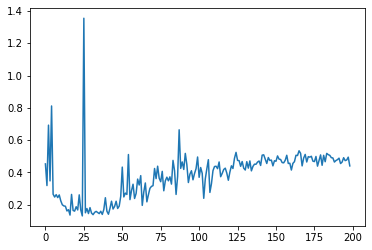

In [17]:
# Loss Gain
plt.plot(history.history['val_loss'])
plt.show()

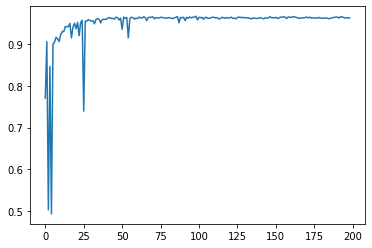

In [18]:
# Loss Gain
plt.plot(history.history['val_accuracy'])
plt.show()

In [19]:
# Restore the model with best accuracy
best_model = load_model(save_file)

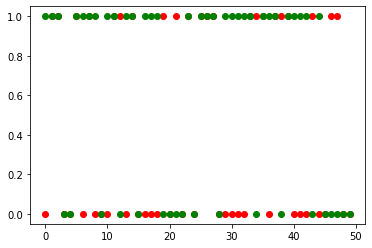

In [20]:
# Small sample of results
score = numpy.asarray(model.predict(x_validation))
results = numpy.where(score >= 0.5, 1, 0)
plt.scatter( range(len(results[0:50])), results[0:50], c='r' )
plt.scatter( range(len(results[0:50])), y_test[0:50], c='g' )
plt.show()

In [21]:
# validate the model
scores = best_model.evaluate(x_test, y_test, batch_size=10)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

640/640 [==============================] - 2s 4ms/step - loss: 0.4235 - accuracy: 0.9659

accuracy: 96.59%
